In [12]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
deliveries = pd.read_csv('Ipl Data/deliveries.csv')

In [14]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [15]:
#find out top bowlers - counting most number of wickets
bowlers = deliveries[deliveries['dismissal_kind'] != 'run out']
bowlers = deliveries.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers

index wickets
bowler                            
A Ashish Reddy 0     80497  bowled
               1     80502  caught
               2     81750  caught
               3     82253  caught
               4     83084  caught
...                    ...     ...
Z Khan         114  142480  caught
               115  143476  bowled
               116  144752  caught
               117  147288  caught
               118  149389  caught

[8834 rows x 2 columns]

In [16]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers = bowlers_df.sort_values(by='wickets', ascending=False)[:10]

In [17]:
top_bowlers

,bowler,index,wickets
294,SL Malinga,188,188
84,DJ Bravo,168,168
6,A Mishra,165,165
113,Harbhajan Singh,161,161
231,PP Chawla,156,156
48,B Kumar,141,141
236,R Ashwin,138,138
300,SP Narine,137,137
330,UT Yadav,136,136
247,R Vinay Kumar,127,127


In [18]:
bowlers_df

,bowler,index,wickets
0,A Ashish Reddy,19,19
1,A Chandila,11,11
2,A Choudhary,5,5
3,A Flintoff,2,2
4,A Joseph,6,6
...,...,...,...
347,YA Abdulla,15,15
348,YK Pathan,46,46
349,YS Chahal,102,102
350,Yuvraj Singh,39,39


Top 10 wicket takers in the History of IPL


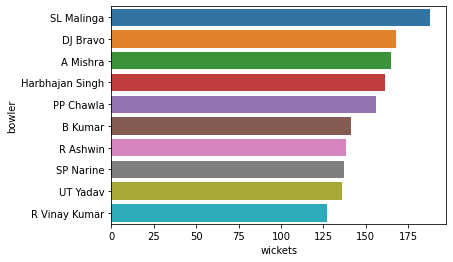

In [19]:
print("Top 10 wicket takers in the History of IPL")
sns.barplot(top_bowlers['wickets'],top_bowlers['bowler'])
plt.savefig("graphs/top_10_wicket_takers.jpg")

In [ ]:
matches_dataset=pd.read_csv("Ipl Data/matches.csv")

In [ ]:
matches_dataset['team1'].unique()

In [ ]:
# Highest team score in each season

deliveries=deliveries.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
deliveries=deliveries.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
deliveries=deliveries.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad")

matches = []
total_innings = []
batting_team = []
runs = []

for match_no in deliveries['match_id'].unique():
    for innings in deliveries[ deliveries['match_id']==match_no ]['inning'].unique():
        df = deliveries[
                        (deliveries['match_id']==match_no) &
                        (deliveries['inning']==innings)
        ]
        total_runs = df['total_runs'].sum()
        runs.append(total_runs)
        matches.append(match_no)
        total_innings.append(innings)
        batting_team.append(df['batting_team'].unique()[0])

In [ ]:
#Final Dataset after preprocessing
df1 = pd.DataFrame()
df1['match_id'] = matches
df1['total_runs'] = runs
df1['season'] = [matches_dataset[ matches_dataset['id']==i ]['season'].unique()[0] for i in matches] 
df1['batting_team'] = batting_team


df1

In [ ]:
#Maximum score in each season

season = []
teamId = []
max_runs = []
for year in df1['season'].unique():
    maximum_run = df1[ df1['season']==year ]['total_runs'].max()
    team = df1[ (df1['season']==year) & (df1['total_runs']==maximum_run) ]['batting_team'].unique()[0]
    season.append(year)
    teamId.append(team)
    max_runs.append(maximum_run)

max_runs

In [ ]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(13,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Highest team score in each season",fontsize=20)
ax=sns.barplot(x = season, y = max_runs, hue = teamId, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))


In [ ]:
deliveries=deliveries.replace(to_replace='RG Sharma', value='R Sharma')
def Batsmen(bat_name, fig, axes, pos):
    data = []
    for match in deliveries['match_id'].unique():
        df_tmp = deliveries[
                (deliveries['batsman']==bat_name) &
                (deliveries['match_id']==match) &
                (deliveries['is_super_over']==0) &
                (deliveries['wide_runs']==0)
        ]
        if df_tmp.shape[0]==0: continue

        out = 0
        if bat_name in df_tmp['player_dismissed'].unique(): out=1
        how_out = None
        if out: how_out = df_tmp[ df_tmp['player_dismissed']==bat_name ]['dismissal_kind'].unique()[0]

        row = []
        row.append(match)
        row.append(df_tmp['batsman_runs'].sum())
        row.append(df_tmp.shape[0])
        #print(row)
        dic = dict(df_tmp['batsman_runs'].value_counts())
        runs = 0
        for i in range(7):
            if i in dic.keys(): 
                row.append(dic[i])
                runs += i*dic[i]
            else: row.append(0)
        row.append(out)
        row.append(how_out)

        data.append(row)
        #assert(row[2]==sum(row[3:10]))
        #assert(row[1]==runs)

    #print(data)
    df_bat = pd.DataFrame(data, columns=['match_id', 'total_runs', 'total_balls', '0', '1', '2', '3', '4', '5', '6', 'out', 'how_out'])
    df_bat.head(10)
    print("Number of Innings Played by "+bat_name+" = "+str(df_bat.shape[0]))
    if df_bat['out'].sum()!=0: print(bat_name+'\'s Average = '+str(df_bat['total_runs'].sum()/df_bat['out'].sum()))
    
    sns.set()
    sns.set_palette(sns.color_palette('tab10'))
    df_bat[ df_bat['out']==1 ]['total_runs'].plot(kind='hist', ax = axes[0, pos])
    axes[0,pos].set_title(bat_name+'\'s Runs in all the matches', fontsize=20)
    #plt.show()
    
    st = df_bat['total_runs']/df_bat['total_balls']*100
    print(bat_name+'\'s Strike rate = '+str(np.average(st)))
    st.plot(kind='hist', ax = axes[1, pos])
    axes[1,pos].set_title(bat_name+'\'s Strike Rate in all the matches', fontsize=20)
    #plt.show()
    
    runs = []
    for i in [1,2,4,6]:
        runs.append(i*df_bat[str(i)].sum())
    axes[2,pos].pie(runs, labels = ['1\'s','2\'s','4\'s','6\'s'], autopct = "%1.0f%%")
    axes[2,pos].set_title(bat_name+'\'s Percentage of Runs', fontsize=20)
    #plt.show()
    
    axes[3,pos].pie(df_bat['how_out'].value_counts().values, labels = df_bat['how_out'].value_counts().index, autopct = '%1.0f%%')
    axes[3,pos].set_title('How '+bat_name+' got out', fontsize=20)
    #plt.show()
    
name = ['DA Warner', 'V Kohli', 'R Sharma', 'AD Russell', 'HH Pandya', 'RR Pant']
pos = 0
fig, axes = plt.subplots(4,len(name), figsize = (60,40))
for i in name:
    print('Batsman\'s name = '+i)
    Batsmen(i, fig, axes, pos)
    pos +=1
    print()
plt.show()
#fig.savefig('Batsmen.png')

In [ ]:
matches = []
total_innings = []
batsman_name = []
runs = []

for match_no in deliveries['match_id'].unique():
    for innings in deliveries[ deliveries['match_id']==match_no ]['inning'].unique():
        df = deliveries[
                        (deliveries['match_id']==match_no) &
                        (deliveries['inning']==innings)
        ]
        batsman_runs = df['batsman_runs'].sum()
        runs.append(batsman_runs)
        matches.append(match_no)
        total_innings.append(innings)
        batsman_name.append(df['batsman'].unique()[0])

In [ ]:
df1 = pd.DataFrame()
df1['match_id'] = matches
df1['batsman_runs'] = runs
df1['season'] = [matches_dataset[ matches_dataset['id']==i ]['season'].unique()[0] for i in matches] 
df1['batsman'] = batsman_name


df1

In [ ]:
season = []
teamId = []
max_runs = []
for year in df1['season'].unique():
    maximum_run = df1[ df1['season']==year ]['batsman_runs'].max()
    team = df1[ (df1['season']==year) & (df1['batsman_runs']==maximum_run) ]['batsman'].unique()[0]
    season.append(year)
    teamId.append(team)
    max_runs.append(maximum_run)



In [ ]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(13,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Highest batsman score in each season",fontsize=20)
ax=sns.barplot(x = season, y = max_runs, hue = teamId, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))
